# Assignment 7: Bhavya Pandey

## Exploratory Data Analysis: NYC TLC Trips Tips Data

This notebook seeks to undertake EDA on the NYC TLC data with special emphasis on tips data (`tip_amount`). The key idea is to understand whether it is possible to find relationships between riders' tipping behavior with other related variables such as day of the week, number of passengers, and so on. Eventually, modelling the data can further the insights into riders' behaviour with regards to tipping for can rides, and even provide scope for coming up with a predictive machine learning model to determine the tips riders may be willing to give, based on the different variables pertaining to the rides they take.

Configuring the environment and loading the data

In [1]:
%%configure -f
{
    "conf": {
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
    }
}

In [2]:
df = spark.read.parquet('s3://nyc-tlc/trip data/yellow_tripdata_2019*.parquet')

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1683834492967_0005,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: integer (nullable = true)

In [5]:
# installing packages 
sc.install_pypi_package("boto3==1.19.2")
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("scipy==1.4.1")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.1")
sc.install_pypi_package("datetime==5.1")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/59/60/163503f24cf09553d0bb6c37db9ff3254f6cda812cab00430602867d03f5/boto3-1.19.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6a/73/552b27e3a1b4f83630907c4958be78e9d4c906e73efd554ebd5e21cb1692/botocore-1.22.12-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7b/9c/f51775ebe7df5a7aa4e7c79ed671bde94e154bd968aca8d65bb24aba0c8c/s3transfer-0.5.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7b/f5/890a0baca17a61c1f92f72b81d3c31523c99bec609e60c292ea55b387ae8/urllib3-1.26.15-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/af/f3/683bf2547a3eaeec15b39cef86f61e921b3b187f250fcd2b5c5fb4386369/pandas-1.0.5-cp37-cp37m-manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.

In [6]:
# importing necessary libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Creating a temporary view of the dataset to plot it

In [10]:
sampled_df = df.sample(fraction=0.0001)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
sampled_df.createOrReplaceTempView("taxi")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Retaining the original view for cases where memory constraints will not affect the plotting

In [19]:
df.createOrReplaceTempView("taxi2")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Question 1: How does tip amount vary with fare amount?

In [12]:
query2 = '''
        SELECT fare_amount, tip_amount
        FROM taxi
        '''
df3 = spark.sql(query2) 

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
df3.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+----------+
|fare_amount|tip_amount|
+-----------+----------+
|        6.0|       0.0|
|       14.5|      3.66|
|        7.5|       0.7|
|        3.0|      1.35|
|       10.5|      2.75|
|        6.5|      1.96|
|        5.5|      1.75|
|        4.5|       0.0|
|        4.5|       0.0|
|        8.0|      2.26|
|        7.0|      3.05|
|        5.5|       1.0|
|        7.0|       0.0|
|        5.5|       0.0|
|        4.5|       1.2|
|       12.5|      3.16|
|       27.0|      6.25|
|       28.0|       0.0|
|       11.0|      3.05|
|       10.0|      2.86|
+-----------+----------+
only showing top 20 rows

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

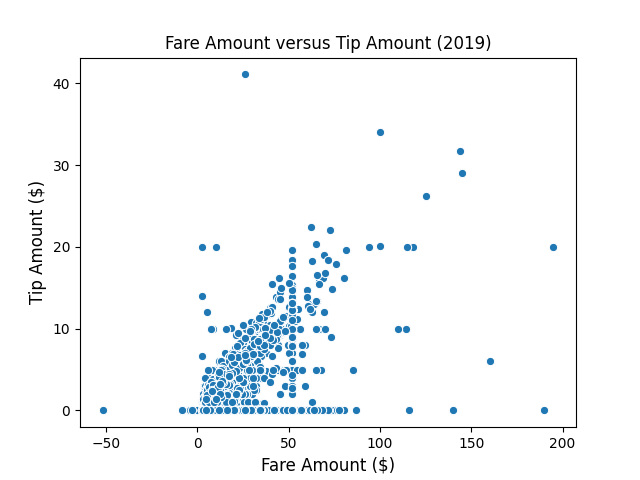

In [66]:
# convert to Pandas DataFrame in order to plot
pdf = df3.toPandas()

# Close previous plots; otherwise, will just overwrite and display again
plt.close()

ax = sns.scatterplot(x='fare_amount', y='tip_amount', data=pdf)
plt.title('Fare Amount versus Tip Amount (2019)')
ax.set_xlabel('Fare Amount ($)', fontsize=12)
ax.set_ylabel('Tip Amount ($)', fontsize=12)

%matplot plt

This vizualization seeks to understand whether the trend of tipping varies with the amount of the ride fare. As in, whether riders tip more in case the fare amount is larger, and vice-versa. Based on the plot generated above, we can see that there are some patterns which can be observed: some riders do not tip at all, no matter the fare amount, some riders tip more as the fare amount rises above the average, but in general since most ride fares lie in the <100 dollar bracket, tips are proportionately concentrated around the <10 dollar bracket.

### Question 2: How does tip amount vary with payment type?

In [20]:
query = '''
        SELECT payment_type, AVG(tip_amount) as avg_tip
        FROM taxi2
        GROUP BY payment_type
        ORDER BY payment_type
        '''

df2 = spark.sql(query) 

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
df2.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+--------------------+
|payment_type|             avg_tip|
+------------+--------------------+
|           0| 0.06157884077473712|
|           1|  3.0533440975733117|
|           2|3.007992978519601...|
|           3| 0.31103719521057144|
|           4|-0.00461531865175...|
|           5| 0.06060606060606061|
+------------+--------------------+

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

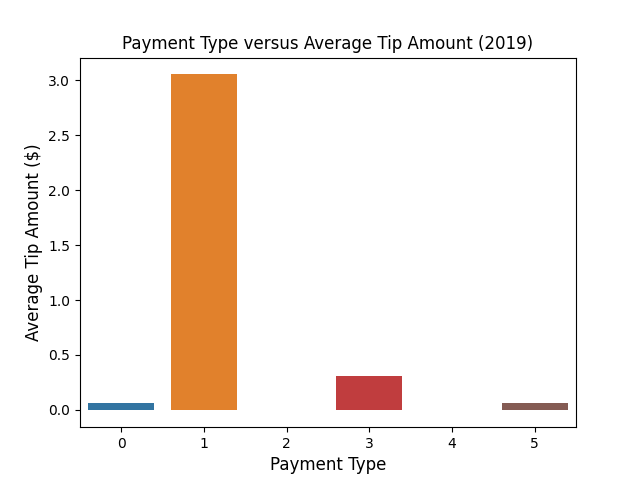

In [69]:
# convert to Pandas DataFrame in order to plot
pdf2 = df2.toPandas()

# Close previous plots; otherwise, will just overwrite and display again
plt.close()

ax = sns.barplot(x='payment_type', y='avg_tip', data=pdf2)
plt.title('Payment Type versus Average Tip Amount (2019)')
ax.set_xlabel('Payment Type', fontsize=12)
ax.set_ylabel('Average Tip Amount ($)', fontsize=12)

%matplot plt

As per the documentation for this dataset, total fare does not include tips in cash, and only includes tips through credit card. Credit cards are the most common payment mode for tipping, as is alluded to in the above visualization where 0 stands for an 'Unknown' mode of payment, 1 denotes payments made through a Credit Card, 2 are the payments where there was no charge, 3 are cash payments, 4 are the 'Disputed' payments, and 5 stands for the 'Voided trips'. We also note that the highest average tip amount is also made through credit cards.

### Question 3: How does tip amount vary with distance travelled?

In [23]:
query = '''
        SELECT trip_distance, tip_amount
        FROM taxi
        '''

df4 = spark.sql(query) 

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
df4.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+----------+
|trip_distance|tip_amount|
+-------------+----------+
|         0.79|       0.0|
|         3.92|      3.66|
|          1.4|       0.7|
|          0.2|      1.35|
|          2.9|      2.75|
+-------------+----------+
only showing top 5 rows

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

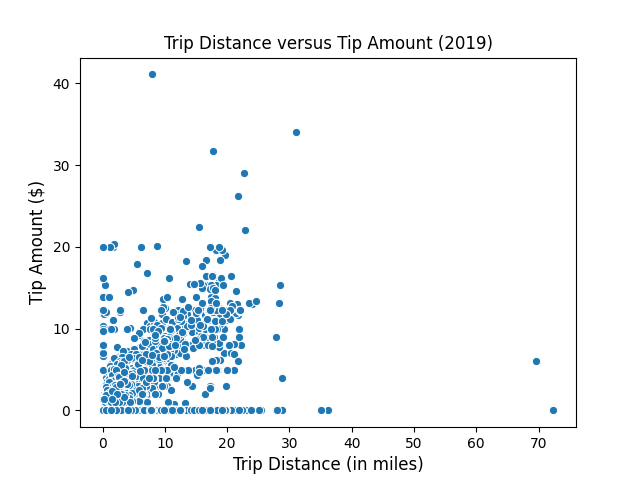

In [70]:
# convert to Pandas DataFrame in order to plot
pdf3 = df4.toPandas()

# Close previous plots; otherwise, will just overwrite and display again
plt.close()

ax = sns.scatterplot(x='trip_distance', y='tip_amount', data=pdf3)
plt.title('Trip Distance versus Tip Amount (2019)')
ax.set_xlabel('Trip Distance (in miles)', fontsize=12)
ax.set_ylabel('Tip Amount ($)', fontsize=12)

%matplot plt

In general, from the above vizualization we can detect a positive correlation between the trip distance (in miles) and the tip amount. This observation is also linked with the fare amount observation in the previous observation, such that as the trip distance and fare amount increase together, passengers tend to tip more. In this vizualization, we find a lot more scatter points concentrated in the 0-30 mile trip distance, and 0-20 dollar tip range since these represent the most frequent data points in the data, which makes sense as it can be concluded that riders generally tend to take cabs for destinations that are not too far their current locations, and also enure that they do not incur too large of costs while doing so.

### Question 4: How does tip amount vary with number of passengers?

In [37]:
query = '''
        SELECT tip_amount, passenger_count
        FROM taxi
        '''

df5 = spark.sql(query)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
df5.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------------+
|tip_amount|passenger_count|
+----------+---------------+
|       0.0|            1.0|
|      3.66|            1.0|
|       0.7|            1.0|
|      1.35|            1.0|
|      2.75|            1.0|
+----------+---------------+
only showing top 5 rows

In [72]:
plt.close()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

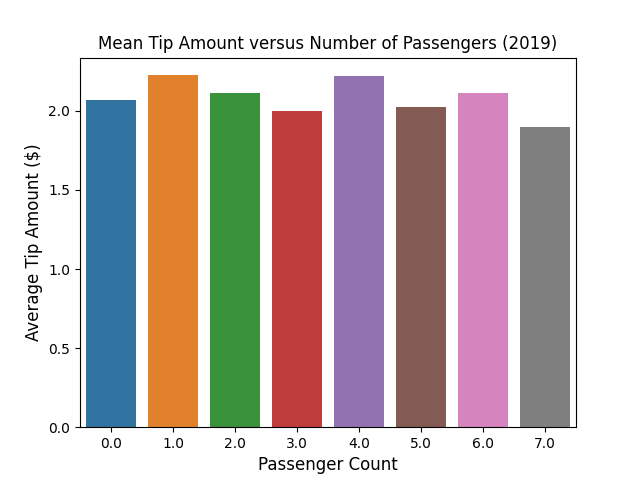

In [73]:
import pyspark.sql.functions as F

# finding tip means
tip_means = df5.groupBy('passenger_count').agg(F.mean('tip_amount').alias('mean_tip_amount'))
pdf5 = tip_means.toPandas().reset_index()

# create a bar plot
ax = sns.barplot(x='passenger_count', y='mean_tip_amount', data=pdf5)
plt.title('Mean Tip Amount versus Number of Passengers (2019)')
ax.set_xlabel('Passenger Count', fontsize=12)
ax.set_ylabel('Average Tip Amount ($)', fontsize=12)

%matplot plt

In [44]:
tip_means.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+------------------+
|passenger_count|   mean_tip_amount|
+---------------+------------------+
|           null|               0.0|
|            1.0|2.2255519918973663|
|            6.0|2.1134782608695653|
|            5.0| 2.025740181268882|
|            2.0|2.1147714949651433|
+---------------+------------------+
only showing top 5 rows

We can note from this vizualization that the average tip amount does not vary much, with the number of passengers in the can for a particular trip. This means that riders do not consider tipping more or less of there are more or less people in the cab for a particular ride. This is an interesting observation given that it may be hypothesized that more people in a ride may all end up tipping a little, resulting in higher tips, however this is not the case being observed here.

### Question 5: How does tip amount vary with day of the week?

In [15]:
from pyspark.sql.functions import date_format

# Convert pickup datetime to day of week
df = df.withColumn("day_of_week", date_format("tpep_pickup_datetime", "E"))

# Group by day of week and calculate average tip amount
avg_tip_by_day = df.groupBy("day_of_week").agg({"tip_amount": "avg"})

# Convert PySpark DataFrame to Pandas DataFrame for visualization
avg_tip_by_day_pd = avg_tip_by_day.toPandas()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [63]:
avg_tip_by_day_pd.head(10)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  day_of_week  avg(tip_amount)
0         Thu         2.294477
1         Wed         2.260296
2         Fri         2.213869
3         Mon         2.226955
4         Sun         2.119089
5         Sat         1.974810
6         Tue         2.219967

In [13]:
plt.close()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

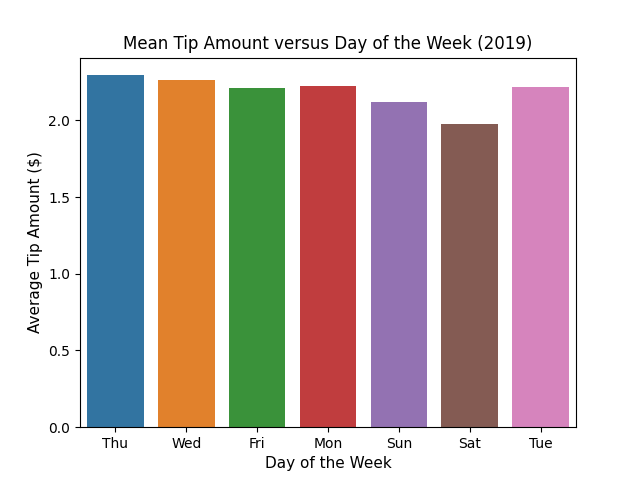

In [16]:
# create a bar plot
ax = sns.barplot(x='day_of_week', y='avg(tip_amount)', data=avg_tip_by_day_pd)
plt.title('Mean Tip Amount versus Day of the Week (2019)')
ax.set_xlabel('Day of the Week', fontsize=11)
ax.set_ylabel('Average Tip Amount ($)', fontsize=11)

%matplot plt

This vizualization makes it clear that besides the exception of Saturday, which has a marginally less average tip amount, in general, the tip amount does not vary by the day of the week. It is reasonable to make this conclusion that there is no impact of the day of the week on an average rider's tipping decision.

### Conclusion and a Note About Scalability

**Would this EDA approach still be possible at even the largest data sizes?** 
Possibly not, since we had to sample a small portion of the data in order to ensure that we do not run out of memory while vizualizing the data. Hence, it is not possible to carry out the same EDA with the largest data size. For such cases, a more memory optimized method for leveraging the scope for parallelism in the code, as well as on the EMR cluster would be required.


In conclusion, this EDA seeks to address the following questions through the lens of the key variable of interest, **`tips_amount`**;
* How is the data in this column distributed? -- **We have seen how tips amount and average tips amount are distributed within the data, through our vizualizations.**
* How is the data in this column related to that in another column? -- **We have explored how tips vary with the other variables here such as days of the week, number of passangers, distance of trips, and so on.**
* Are there any interesting relationships and patterns that may be useful for modeling one feature via another one (i.e. patterns that you might be able to exploit next week when you attempt to model the data)? -- **Yes, we can seek to model how tips vary with the correspondinge explanatory variables, based on the EDA carried out here.**